# GPyOpt: parallel Bayesian optimization

### Written by Javier Gonzalez, University of Sheffield.

*Last updated Tuesday, 15 March 2016.*

In [10]:
%pylab inline  
import GPyOpt

Populating the interactive namespace from numpy and matplotlib


As in previous examples we use a synthetic objective function but you can think about doing the same with any function you like. In this case, we use the Branin function. For the optimization we will perturb the evaluations with Gaussian noise with sd = 0.1.

In [11]:
# --- Objective function
objective_true  = GPyOpt.objective_examples.experiments1d.forrester()                 # true function
bounds = objective_true.bounds        

In [12]:
bounds[0]

(0, 1)

In [13]:
domain = [{'name': 'var_1', 'type': 'continuous', 'domain': bounds[0]}]

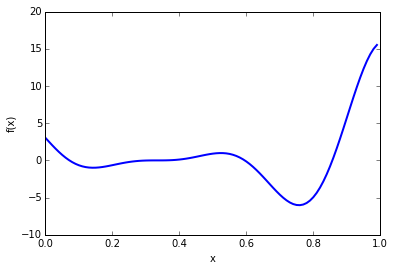

In [14]:
objective_true.plot()

As in previous cases, we create a GPyOpt object with the desing space and fucntion to optimize. In this case we need to select the evaluator type, which in this case is the *local penalization method* the batch size and the number of cores that we want to use. The evaluation of the function will be splitted accross the available cores.

In [15]:
batch_size = 3
num_cores = 2

In [16]:
from numpy.random import seed
seed(123)
BO_demo_parallel = GPyOpt.methods.BayesianOptimization(f=objective_true.f,  
                                            domain = domain,                  
                                            acquisition_type = 'EI',              
                                            normalize_Y = False,
                                            initial_design_numdata = 10,
                                            evaluator_type = 'local_penalization',
                                            batch_size = batch_size,
                                            num_cores = num_cores,
                                            exact_feval = True,
                                            acquisition_jitter = 0)    

** GPyOpt Bayesian Optimization class initialized succesfuly **


In [8]:
BO_demo_parallel.objective._single_evaluation(BO_demo_parallel.X)

(array([[ -4.45162646],
        [ -0.04302052],
        [ -0.39078442],
        [  0.85856795],
        [ -5.35098625],
        [  0.25551069],
        [ 15.03576382],
        [ -3.91511526],
        [  0.76857864],
        [  0.08065485]]),
 [7.200241088867188e-05,
  4.291534423828125e-05,
  3.886222839355469e-05,
  4.00543212890625e-05,
  4.220008850097656e-05,
  3.886222839355469e-05,
  3.695487976074219e-05,
  3.695487976074219e-05,
  3.790855407714844e-05,
  3.719329833984375e-05])

In [9]:
BO_demo_parallel.objective._syncronous_batch_evaluation(BO_demo_parallel.X)

(array([[ -4.45162646],
        [ -0.04302052],
        [ -0.39078442],
        [  0.85856795],
        [ -5.35098625],
        [  0.25551069],
        [ 15.03576382],
        [ -3.91511526],
        [  0.76857864],
        [  0.08065485]]), array([[ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.],
        [ 1.]]))

We will optimize this function by running 10 parallel evaluations in 3 cores of our machine. 

In [ ]:
# --- Run the optimization for 10 iterations
max_iter = 1                                                    
BO_demo_parallel.run_optimization(max_iter)

We plot the resutls. Observe that the final number of evaluations that we will make is $10*4=40$. 

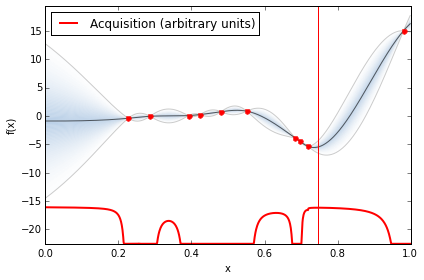

In [17]:
BO_demo_parallel.plot_acquisition()

In [12]:
BO_demo_parallel.suggested_sample

array([[  3.29813697,   1.        ],
       [  3.03426125,   2.06620923],
       [ -3.01557796,  15.        ],
       [  3.03250892,   2.17951741]])

See how the method explores the space using the four parallel evaluations of $f$ and it is able to identify the location of the three minima. 

In [24]:
objective_noisy.min

[(-3.141592653589793, 12.275), (3.141592653589793, 2.275), (9.42478, 2.475)]